In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
import pydataset

### 1. Load the tips dataset from either pydataset or seaborn.

In [2]:
df = sns.load_dataset("tips")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.shape

(244, 7)

### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [5]:
X = ['total_bill']
y = ['tip']

In [6]:
# create the model
model = LinearRegression()

# fit the model to trainig data
model.fit(df[X], df[y])

# make predictions
df['yhat'] = model.predict(df[X])

In [7]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822


### 3. Plot the residuals for the linear regression model that you made.

In [8]:
# residual = predicted - actual
df['residual'] = df.yhat - df.tip
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residual
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178


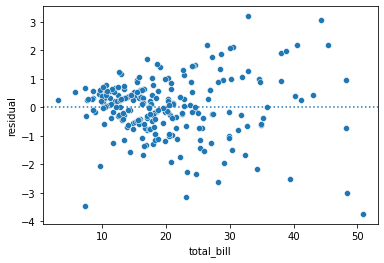

In [9]:
sns.scatterplot(x=df.total_bill, y=df.residual)
plt.axhline(0, ls = ':')

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [10]:
df['residual^2'] = df.residual**2
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residual,residual^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.871792
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,0.119870
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,0.139252
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,0.009458
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,0.011487


In [11]:
# Sum of Squares Error
SSE = df["residual^2"].sum()
SSE

252.788743850776

In [12]:
# Explained Sum of Squares
ESS = ((df.yhat - df.tip.mean())**2).sum()
ESS

212.42373319840422

In [13]:
# Total Sum of Squares
# TSS = ((df.tip - df.tip.mean())**2).sum()
TSS = SSE + ESS
TSS

465.2124770491802

In [14]:
# Mean Squared Error
MSE = SSE/len(df)
MSE

1.036019442011377

In [15]:
# Root Mean Squared Error
RMSE = MSE**0.5
RMSE

1.0178504025697377

### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [16]:
df['baseline'] = df['tip'].mean()
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residual,residual^2,baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.871792,2.998279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,0.119870,2.998279
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,0.139252,2.998279
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,0.009458,2.998279
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,0.011487,2.998279


In [17]:
# create column for baseline residuals
df['baseline_residual'] = df.tip - df.baseline

# create column for squared baseline residuals
df['baseline_residual^2'] = df.baseline_residual**2

df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residual,residual^2,baseline,baseline_residual,baseline_residual^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.871792,2.998279,-1.988279,3.953252
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,0.119870,2.998279,-1.338279,1.790990
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,0.139252,2.998279,0.501721,0.251724
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,0.009458,2.998279,0.311721,0.097170
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,0.011487,2.998279,0.611721,0.374203


In [18]:
SSE_baseline = df['baseline_residual^2'].sum()
SSE_baseline

465.2124770491804

In [19]:
MSE_baseline = SSE_baseline/len(df)
MSE_baseline

1.906608512496641

In [20]:
RMSE_baseline = MSE_baseline**0.5
RMSE_baseline

1.3807999538298954

### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [21]:
if SSE < SSE_baseline:
    print("Our model's SSE is lower than the baseline model's SSE")
    print('Our created model performs better than the baseline model')
else:
    print('The baseline model performs better than our created model')

Our model's SSE is lower than the baseline model's SSE
Our created model performs better than the baseline model


### 7. What is the amount of variance explained in your model?

In [22]:
# Explained Variance
# R2 = ESS/TSS
r2_score(df.tip, df.yhat)

0.45661658635167657

### 8. Is your model better than the baseline model?

Our model performs better than the baseline model

### 9. Create a file named evaluate.py that contains the following functions.

- `plot_residuals(y, yhat)`: creates a residual plot
- `regression_errors(y, yhat)`: returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- `baseline_mean_errors(y)`: computes the SSE, MSE, and RMSE for the baseline model
- `better_than_baseline(y, yhat)`: returns true if your model performs better than the baseline, otherwise false

Text(0, 0.5, 'yhat')

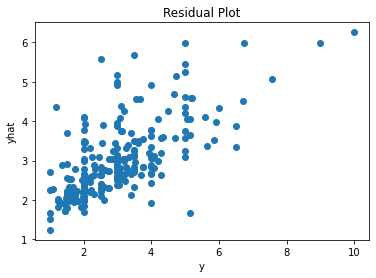

In [23]:
plt.scatter(df.tip, df.yhat)
plt.title('Residual Plot')
plt.xlabel('y')
plt.ylabel('yhat')

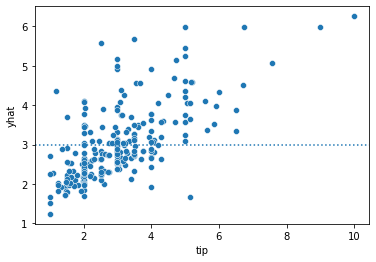

In [24]:
def plot_residuals(y, yhat):
    sns.scatterplot(x=y, y=yhat)
    plt.axhline(yhat.mean(), ls = ':')
    plt.show()
plot_residuals(df.tip, df.yhat)

In [25]:
def regression_errors(y, yhat):
    residual = yhat - y
    residual_sq = residual**2
    SSE = residual_sq.sum()
    ESS = ((yhat - y.mean())**2).sum()
    TSS = SSE + ESS
    MSE = SSE/len(y)
    RMSE = MSE**0.5
    return SSE, ESS, TSS, MSE, RMSE
SSE, ESS, TSS, MSE, RMSE = regression_errors(df.tip, df.yhat)
SSE, ESS, TSS, MSE, RMSE

(252.788743850776,
 212.42373319840422,
 465.2124770491802,
 1.036019442011377,
 1.0178504025697377)

In [26]:
def baseline_mean_errors(y):
    baseline = y.mean()
    base_res = y - baseline
    base_res_sq = base_res**2
    SSE_baseline = base_res_sq.sum()
    MSE_baseline = SSE_baseline/len(y)
    RMSE_baseline = MSE_baseline**0.5
    return SSE_baseline, MSE_baseline, RMSE_baseline
SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(df.tip)
SSE_baseline, MSE_baseline, RMSE_baseline

(465.2124770491804, 1.906608512496641, 1.3807999538298954)

In [27]:
def better_than_baseline(y, yhat):
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
    SSE, ESS, TSS, MSE, RMSE = regression_errors(y, yhat)
    return RMSE < RMSE_baseline
better_than_baseline(df.tip, df.yhat)

True

### 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [28]:
from pydataset import data
mpg = data('mpg')
df = mpg[['displ','hwy']]
df.head()

,displ,hwy
1,1.8,29
2,1.8,29
3,2.0,31
4,2.0,30
5,2.8,26


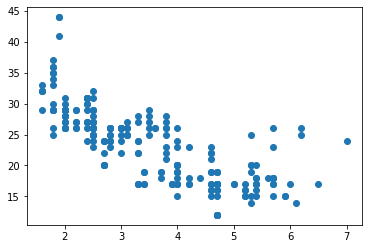

In [29]:
plt.scatter(df.displ, df.hwy)

In [30]:
X = ['displ']
y = ['hwy']

In [31]:
# assuming X and y are already defined
# create the model
model = LinearRegression()

# fit the model to trainig data
model.fit(df[X], df[y])

# make predictions
df['yhat'] = model.predict(df[X])

Text(0, 0.5, 'Highway Mileage')

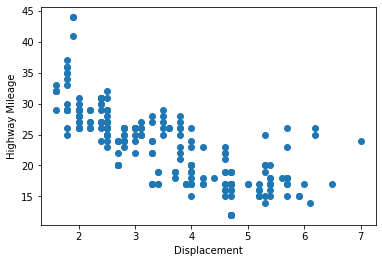

In [32]:
plt.scatter(df.displ, df.hwy)
plt.xlabel('Displacement')
plt.ylabel('Highway Mileage')

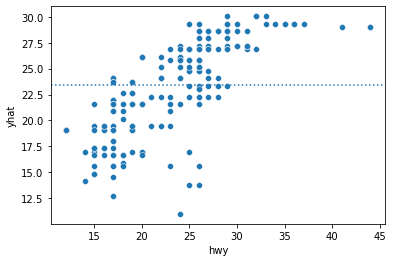

In [33]:
plot_residuals(df.hwy, df.yhat)

In [34]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(df.hwy, df.yhat)
SSE, ESS, TSS, MSE, RMSE

(3413.829008995467,
 4847.8333841669255,
 8261.662393162393,
 14.589012858954987,
 3.8195566312014524)

In [35]:
SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(df.hwy)
SSE_baseline, MSE_baseline, RMSE_baseline

(8261.66239316239, 35.30624954342902, 5.941906221359356)

In [36]:
better_than_baseline(df.hwy, df.yhat)

True